## Вычисление метрики pr-auc и кривой precision-recall после тренировки модели

### Загружаем переобученную модель

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from darkflow.net.build import TFNet

In [2]:
# weights = os.path.join(build_path, 'bin', 'yolo.weights')
build_path = 'test_build'
model = os.path.join(build_path, 'cfg', 'yolo-people.cfg')
cfg = os.path.join(build_path, 'cfg')
labels = os.path.join(build_path, 'labels.txt')
backup = 'D:/data/models/tpe_retrain/ckpt'
summary = 'D:/data/models/tpe_retrain/summary'

options = dict()
options['model'] = model
options['labels'] = labels
options['train'] = False
options['gpu'] = 0.8
options["subdivisions"] = 1
options['backup'] = backup
options['summary'] = summary
options['load'] = -4

In [3]:
#tfnet = TFNet(options)

Parsing test_build\cfg\yolo-people.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 12

### Готовим файлы для серийного предсказания при разных порогах

In [3]:
from markup_predict import darkflow_predict_boxes_from_model

In [4]:
model_train_data = '../data/cam_1_hand_markup/to_xml_boundary/test' # xml-файлы, которые использовались для валидации модели

In [5]:
filenames = [os.path.splitext(x)[0] for x in os.listdir(model_train_data)] # список мен изображений, на которых будем мерить

In [6]:
source_path='D:\\data\\pics\\cam_1_src'
data_path='../data/cam_1_serial_markup/retrain'

In [7]:
import numpy as np

In [8]:
thresholds = np.linspace(0., 0.9, 10)

In [9]:
thresholds

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [10]:
for threshold in thresholds:
    options['threshold'] = threshold
    data_filename = 'darkflow_markup_threshold_' + str(threshold) + '.json'
    log_filename = 'log_threshold_' + str(threshold) + '.txt'
    tfnet = TFNet(options)
    darkflow_predict_boxes_from_model(tfnet, source_path, data_path, filelist = filenames,
                           num_files=None, data_filename=data_filename, log_filename=log_filename,
                           verbose=False)

Parsing test_build\cfg\yolo-people.cfg
Loading None ...
Finished in 0.0010025501251220703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky    

Finished in 7.462075710296631s

Parsing test_build\cfg\yolo-people.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bn

Finished in 7.53174090385437s

Parsing test_build\cfg\yolo-people.cfg
Loading None ...
Finished in 0.0005016326904296875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | 

Finished in 10.200931310653687s

Parsing test_build\cfg\yolo-people.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +b

### Выбираем из ручной разметки файлы, которые есть в test выборке

In [11]:
ground_truth_file = 'C:\\my_cv_work\\tpe_recognition\\data\\cam_1_serial_markup\\gt_markup.json'

In [12]:
import json
with open(ground_truth_file, 'r') as f:
    ground_truth_data = json.loads(f.read())

test_ground_truth = {k: v for k, v in ground_truth_data.items() if os.path.splitext(os.path.basename(k))[0] in filenames }

In [13]:
len(test_ground_truth)

268

In [14]:
test_ground_truth_file = 'C:\\my_cv_work\\tpe_recognition\\data\\cam_1_serial_markup\\retrain\\ground_truth\\test_gt.json'

In [15]:
with open(test_ground_truth_file, 'w') as f:
    json.dump(test_ground_truth, f)

### Считаем scores для размеченных выше файлов с разными порогами

In [16]:
markup_files = [f for f in os.listdir(data_path) if f.endswith('.json')]

In [20]:
from markup_predict import detection_scores

In [22]:
scores = []
for threshold in thresholds:
    for file in markup_files:
        if str(threshold) in file:
            precision, recall, HITS_TOT, NO_TOT, NR_TOT = detection_scores(test_ground_truth_file, os.path.join(data_path, file))
            scores.append({'threshold': threshold,
                           'precision': precision,
                           'recall': recall,
                           'hits': HITS_TOT,
                           'number of detections': NO_TOT,
                           'number of relevant objects': NR_TOT})

In [32]:
prec = []
rec = []
for s in scores:
    prec.append(s['precision'])
    rec.append(s['recall'])
rec.append(0)
prec.append(1)

In [25]:
% matplotlib inline

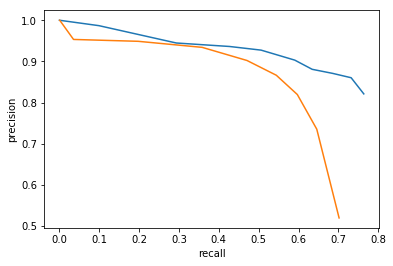

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(rec, prec, rec_y, prec_x)
ax.set_xlabel('recall')
ax.set_ylabel('precision')
plt.show()
#fig.savefig('c:/my_cv_work/fig1.png')

In [34]:
from sklearn.metrics import auc
auc(rec, prec)

0.71333649433869051

In [29]:
prec_x = [0.5195305336512012,
 0.7351945854483926,
 0.819449166950017,
 0.8663249211356467,
 0.9021842355175689,
 0.9341085271317829,
 0.9488095238095238,
 0.9533333333333334,
 1.0]

In [30]:
rec_y = [0.7015849430411094,
 0.6456166419019317,
 0.5968301139177811,
 0.5440812283308568,
 0.47052996532937097,
 0.35809806835066865,
 0.19737493808816245,
 0.0354135710747895,
 0.0007429420505200594]